# Machine Learning and Stats technique

StatQuest Video: https://www.youtube.com/watch?v=yIYKR4sgzI8

#### - R squared can help to determine correlation and we can also use p values to determine confidence 
#### - Normal regression can use a single feature to predict a target value 
#### - Multiple regression uses multiple features to predict a single target value 

#### - Logistical regression predicts things that are true or false instead of continuous (e.g. obese vs not obese instead of weight and size)
#### - Logistical regression is usually used for classification; we can also use use continuous data and discrete data as well an involving multiple features
#### - We can use Wald's Test to determine if features are helpful for determining our target (if its effect is significantly different than zero) 

##### Question: How is statistical significance determined with regards to determining the helpfulness of features?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
pima = pd.read_csv('diabetes.csv') 

In [4]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age'] # these are the features that we will use for Ypred

In [5]:
X = pima[feature_cols]
y = pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_test.value_counts()


0    130
1     62
Name: Outcome, dtype: int64

In [6]:
y_test.count() / pima['Pregnancies'].count()

0.25

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logreg = LogisticRegression()

In [9]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_pred = logreg.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [11]:
print(y_test.values.T)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [12]:
correct_zero = 0
wrong_zero = 0
correct_one = 0
wrong_one = 0 

results = {}
for index, value in enumerate(y_pred): 
    if value == 0:
        if y_pred[index] == y_test.values.T[index]:
            correct_zero += 1
        else:
            wrong_zero += 1
    if value == 1:
        if y_pred[index] == y_test.values.T[index]: 
            correct_one += 1
        else: 
            wrong_one += 1

        
print("correct zeros {}, wrong zeros {}, correct ones {}, wrong ones {}".format(correct_zero, wrong_zero, correct_one, wrong_one))

correct zeros 118, wrong zeros 47, correct ones 15, wrong ones 12


In [13]:
from sklearn import metrics

In [14]:
(118 + 15) / (47 + 118 + 15 + 12)

0.6927083333333334

In [15]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.6927083333333334


In [16]:
15 / (12 + 15)

0.5555555555555556

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# probability 
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438],
       [0.64244443, 0.35755557],
       [0.25912035, 0.74087965],
       [0.63949765, 0.36050235],
       [0.76987637, 0.23012363],
       [0.57345769, 0.42654231],
       [0.80896485, 0.19103515],
       [0.54236399, 0.45763601],
       [0.8809859 , 0.1190141 ],
       [0.56071047, 0.43928953],
       [0.63038849, 0.36961151],
       [0.55812011, 0.44187989],
       [0.62388338, 0.37611662],
       [0.80183978, 0.19816022],
       [0.58322696, 0.41677304],
       [0.84451719, 0.15548281],
       [0.7468329 , 0.2531671 ],
       [0.90256923, 0.09743077],
       [0.30366288, 0.69633712],
       [0.84641691, 0.15358309],
       [0.7802164 , 0.2197836 ],
       [0.

In [18]:
import numpy as np

In [19]:
def evaluation_metrics(TP, FP, TN, FN):
    """ 
    Params: TP = True positive, FP = False positive, TN = True negative, FN = False negative
    Returns: Array with accuracy, precision, recall, F1_score
    """
    metrics = []
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    metrics.append(accuracy)
    
    precision = (TP) / (TP + FP)
    metrics.append(precision)
    
    recall = (TP) / (FN + TP)
    metrics.append(recall)
    
    F1_score = 2 * precision * recall / (precision + recall)
    metrics.append(F1_score)
    
    return metrics

#calculate evaluation metrics of RoboCop data
evaluation_metrics(3, 5, 3, 1)

[0.5, 0.375, 0.75, 0.5]

In [20]:
# results of diabetes confusion matrix
confusion = np.array ([[118., 12.], [47., 15.]])

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

#calculate the evaluation metrics of our diabetes data
evaluation_metrics(TP, FP, TN, FN)

[0.6927083333333334,
 0.5555555555555556,
 0.24193548387096775,
 0.3370786516853933]

In [23]:
y_pred_prob = logreg.predict_proba(X_test)

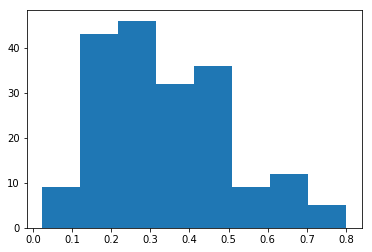

In [24]:
plt.hist(y_pred_prob[:, 1], bins=8)
plt.show()

In [41]:
threshold = y_train.value_counts()[1] / len(y_train)
up_to_one = y_pred_prob[:, 1]
threshold

0.3576388888888889

In [54]:
def predict_greater(threshold, up_to_one):
    above_threshold = []
    below_threshold = []
    
    for value in up_to_one:
        if value > threshold: 
            above_threshold.append(1)
        else: 
            below_threshold.append(0)
            
    results = []
    
    results += above_threshold
    results += below_threshold
    
    print(len(above_threshold))
    print(len(below_threshold))
    
    return results

new_y_pred = predict_greater(threshold, up_to_one)
len(new_y_pred)

81
111


192

In [57]:
optimal_confusion = metrics.confusion_matrix(y_test, new_y_pred)
optimal_confusion

array([[75, 55],
       [36, 26]])